# <p><center style="font-family:newtimeroman;font-size:180%;"> Fire Variety Classification and Quality Evaluation Using Image Analysis </center></p>
### Table of contents:

* [Import Libraries](#1)
* [Read Data](#2)
* [Visualization Of Dataset](#3)
* [Train VGG16 Model](#4)
* [Evaluate The Model](#5)
* [Testing Model](#6)

**<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
import os
import cv2
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Read Data </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
#Files
path='/kaggle/input/fire-dataset/fire_dataset'
pd.DataFrame(os.listdir(path),columns=['Files'])

Files
0  non_fire_images
1      fire_images

In [3]:
train_data_dir =path
batch_size = 32
target_size = (224, 224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=44,
    image_size=target_size,
    batch_size=batch_size,
)

Found 999 files belonging to 2 classes.
Using 800 files for training.
Found 999 files belonging to 2 classes.
Using 199 files for validation.


**<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Visualization of Dataset </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [4]:
class_names = train.class_names
class_names

['fire_images', 'non_fire_images']

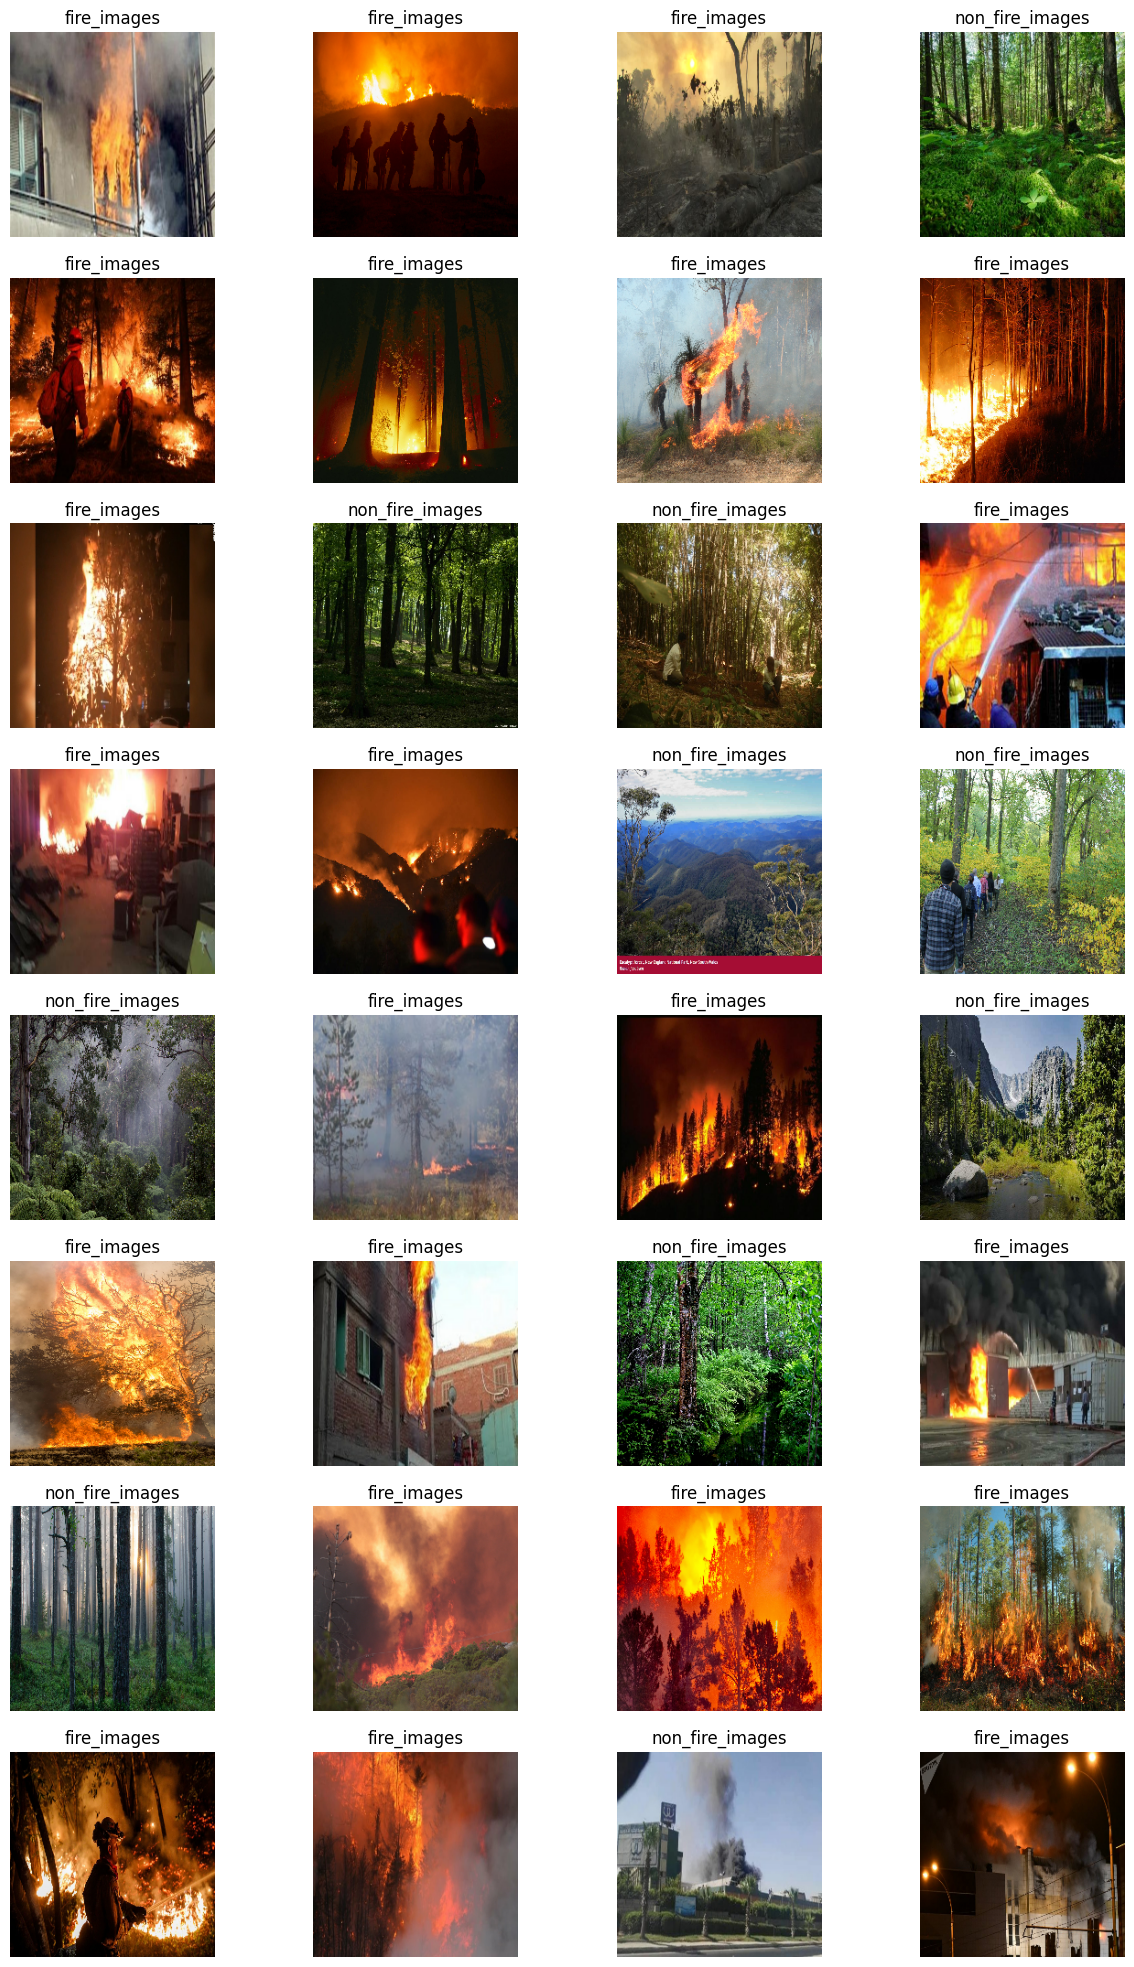

In [5]:
plt.figure(figsize=(15, 25))
for images, labels in train.take(1):
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Modeling </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [6]:
base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
model=keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


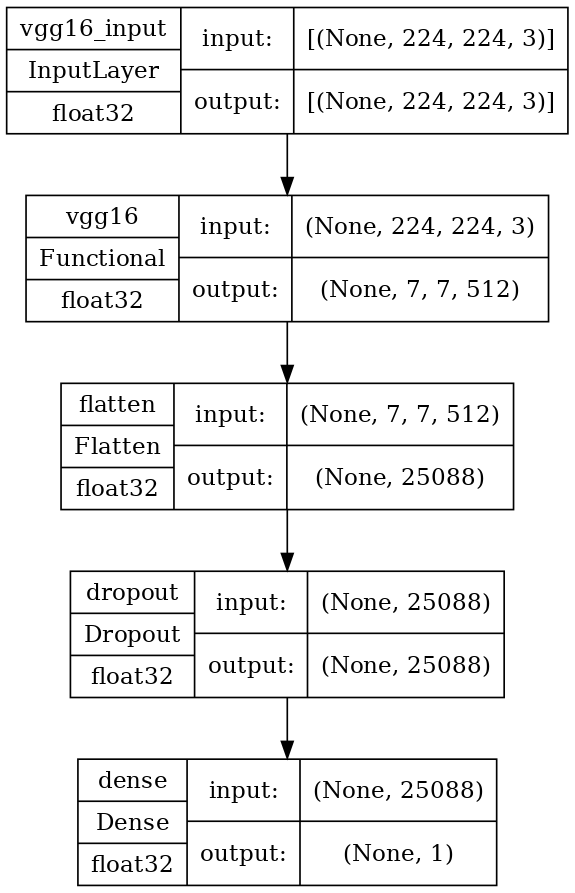

In [7]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [8]:
checkpoint_cb =ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=3, restore_best_weights=True)
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics=['accuracy'])
hist=model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
25/25 [==============================] - 33s 730ms/step - loss: 1.4413 - accuracy: 0.8825 - val_loss: 0.3300 - val_accuracy: 0.9749
Epoch 2/20
25/25 [==============================] - 18s 576ms/step - loss: 0.1591 - accuracy: 0.9812 - val_loss: 0.2140 - val_accuracy: 0.9899
Epoch 3/20
25/25 [==============================] - 17s 551ms/step - loss: 0.0255 - accuracy: 0.9950 - val_loss: 0.2882 - val_accuracy: 0.9849
Epoch 4/20
25/25 [==============================] - 17s 572ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.2470 - val_accuracy: 0.9899
Epoch 5/20
25/25 [==============================] - 17s 543ms/step - loss: 0.0087 - accuracy: 0.9962 - val_loss: 0.2421 - val_accuracy: 0.9899


In [9]:
score, acc = model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

7/7 [==============================] - 4s 118ms/step - loss: 0.2140 - accuracy: 0.9899
Test Loss = 0.21399495005607605
Test Accuracy = 0.9899497628211975


In [10]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  val_loss  val_accuracy
0  1.441262   0.88250  0.330027      0.974874
1  0.159053   0.98125  0.213995      0.989950
2  0.025543   0.99500  0.288247      0.984925
3  0.012537   0.99625  0.247024      0.989950
4  0.008734   0.99625  0.242091      0.989950

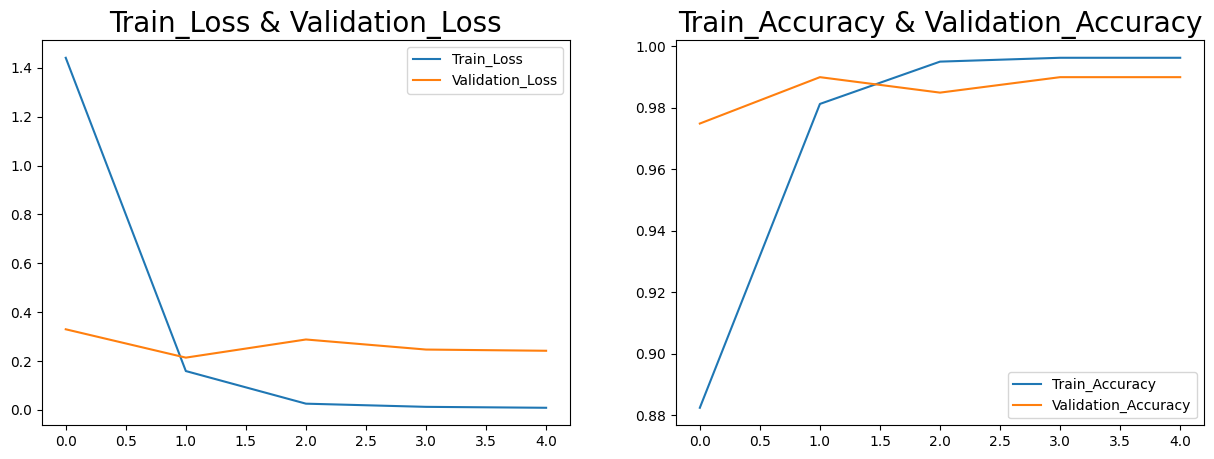

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [12]:
X_val,y_val=[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=model.predict(np.array(X_val))
y_pred=np.where(predictions>=.5,1,0)
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

7/7 [==============================] - 1s 131ms/step


Actual  Prediction
0         0           0
1         0           0
2         1           1
3         0           0
4         0           0
..      ...         ...
194       0           0
195       0           0
196       0           0
197       1           1
198       0           0

[199 rows x 2 columns]

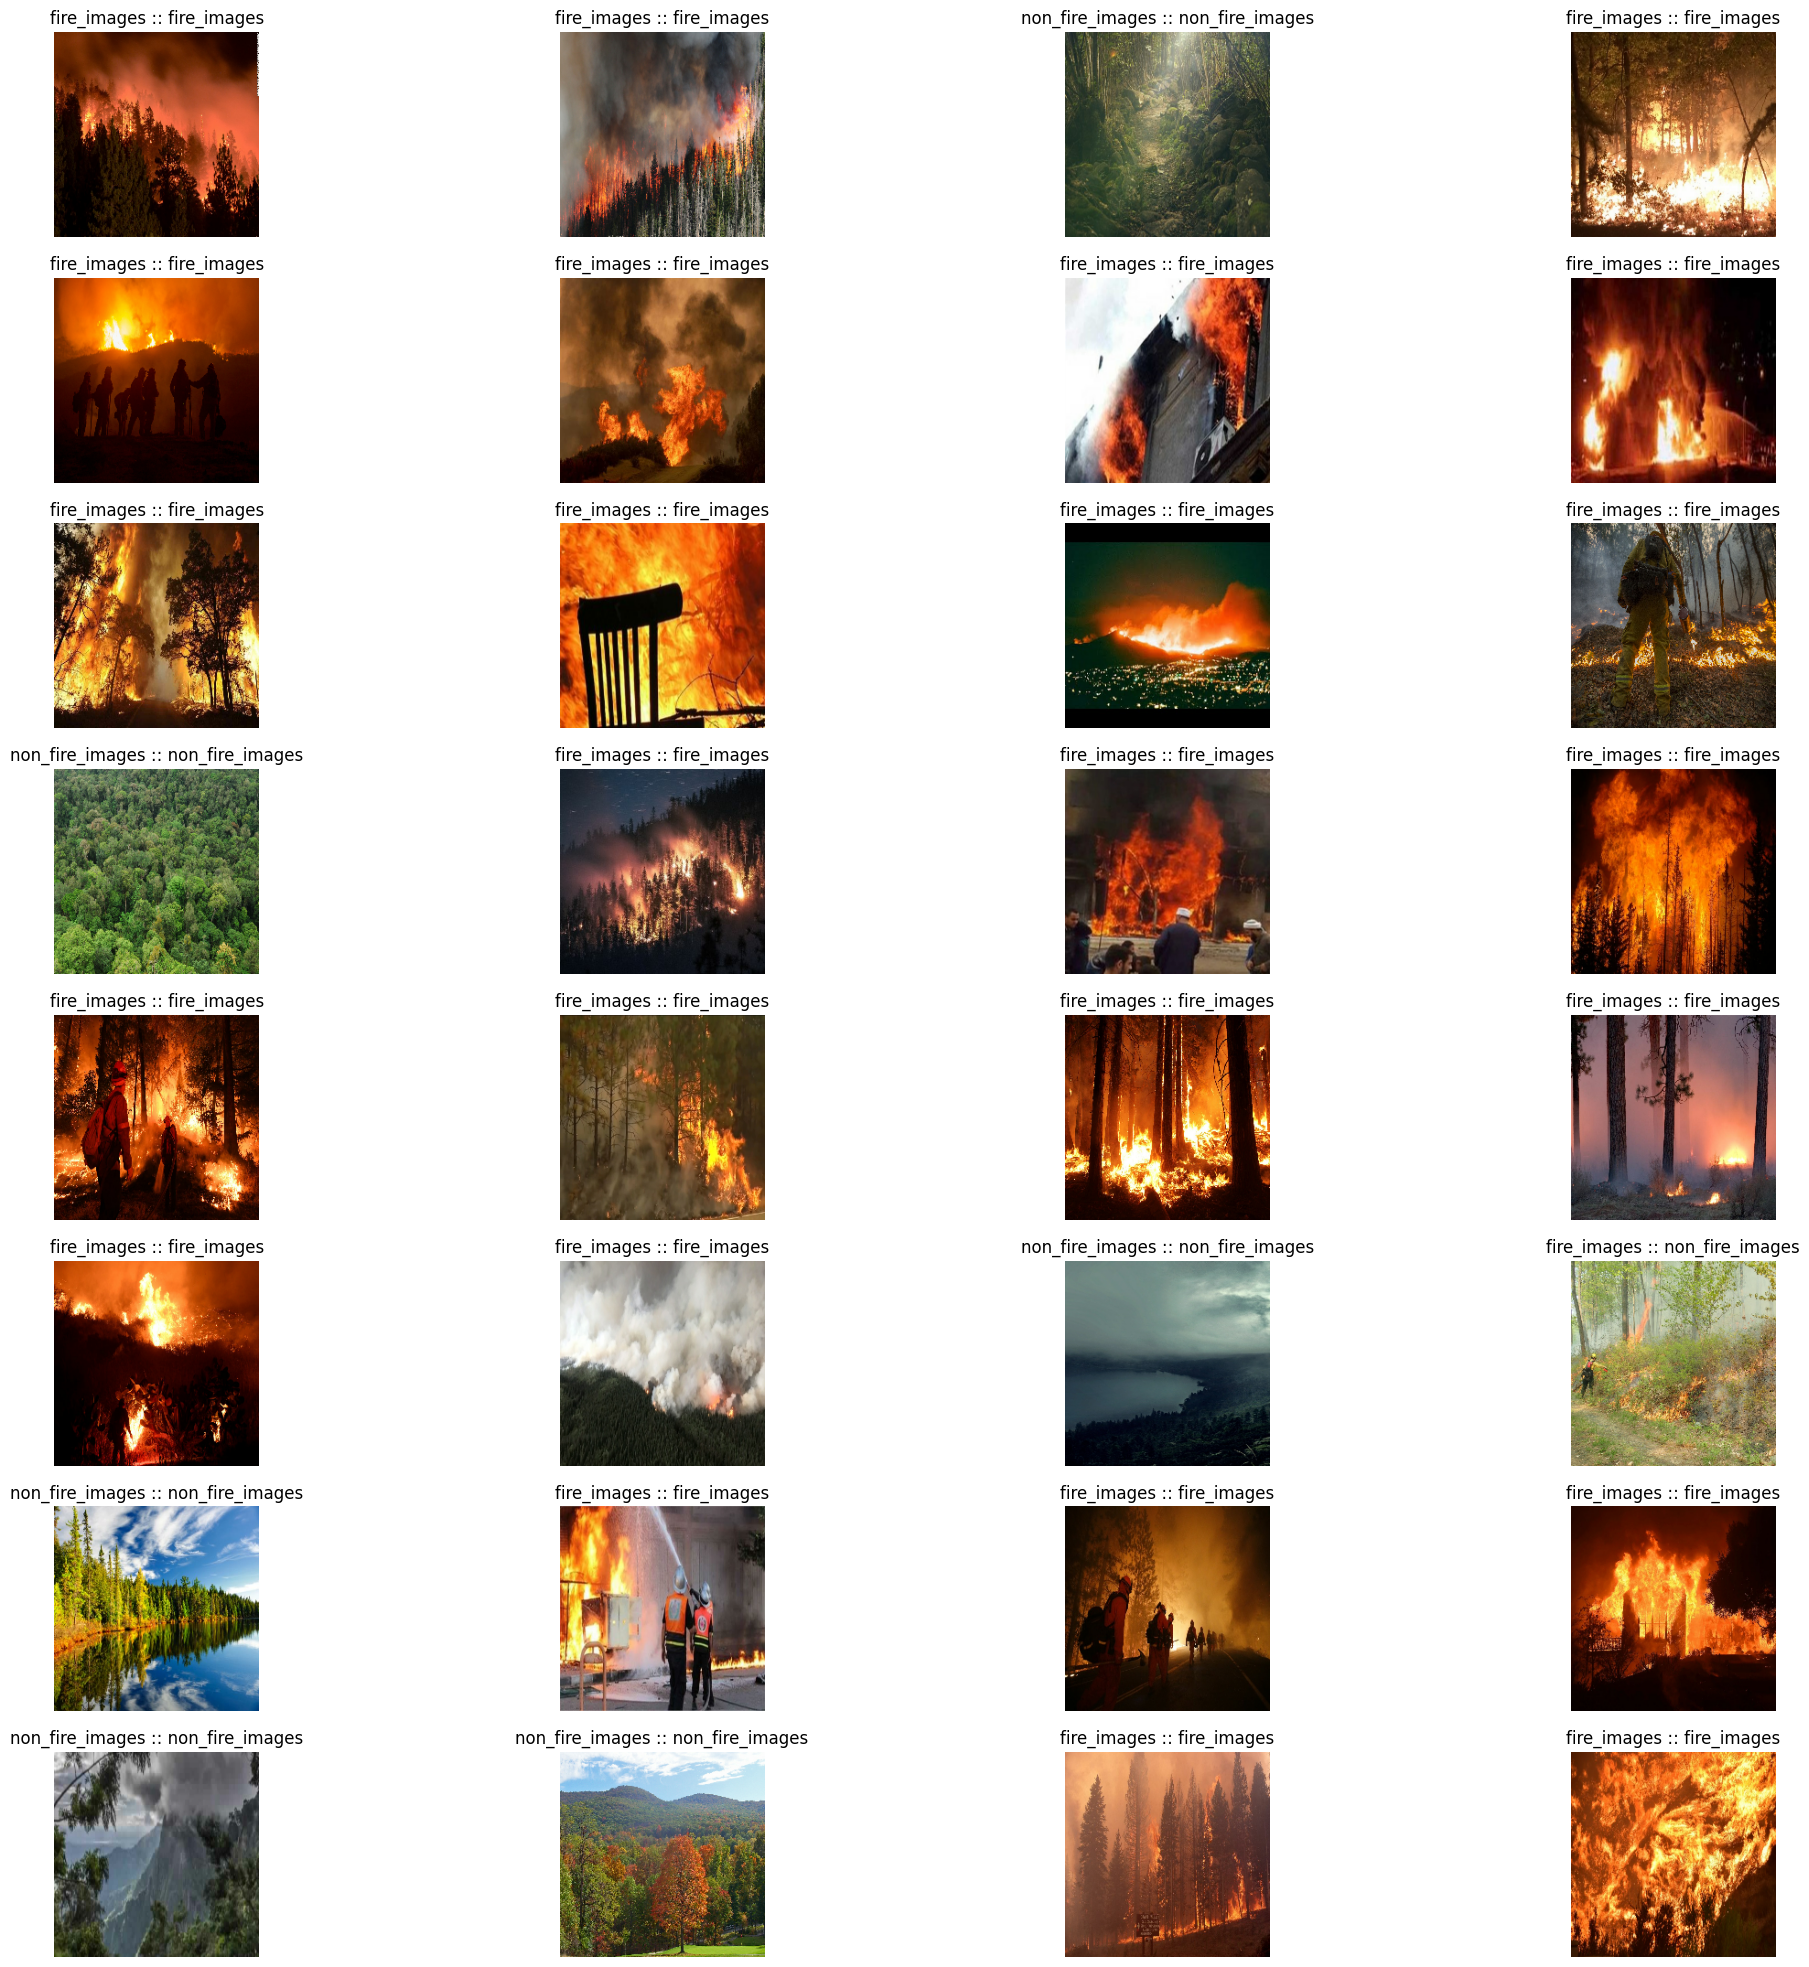

In [13]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i][0]]}')
    plt.axis("off")

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Evaluate The Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

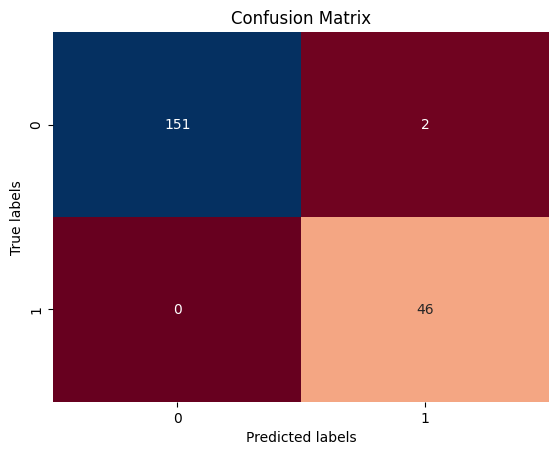

array([[151,   2],
       [  0,  46]])

In [14]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [15]:
ClassificationReport = classification_report(y_val,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.96      1.00      0.98        46

    accuracy                           0.99       199
   macro avg       0.98      0.99      0.99       199
weighted avg       0.99      0.99      0.99       199



<a id="6"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Testing Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

1/1 [==============================] - 0s 19ms/step


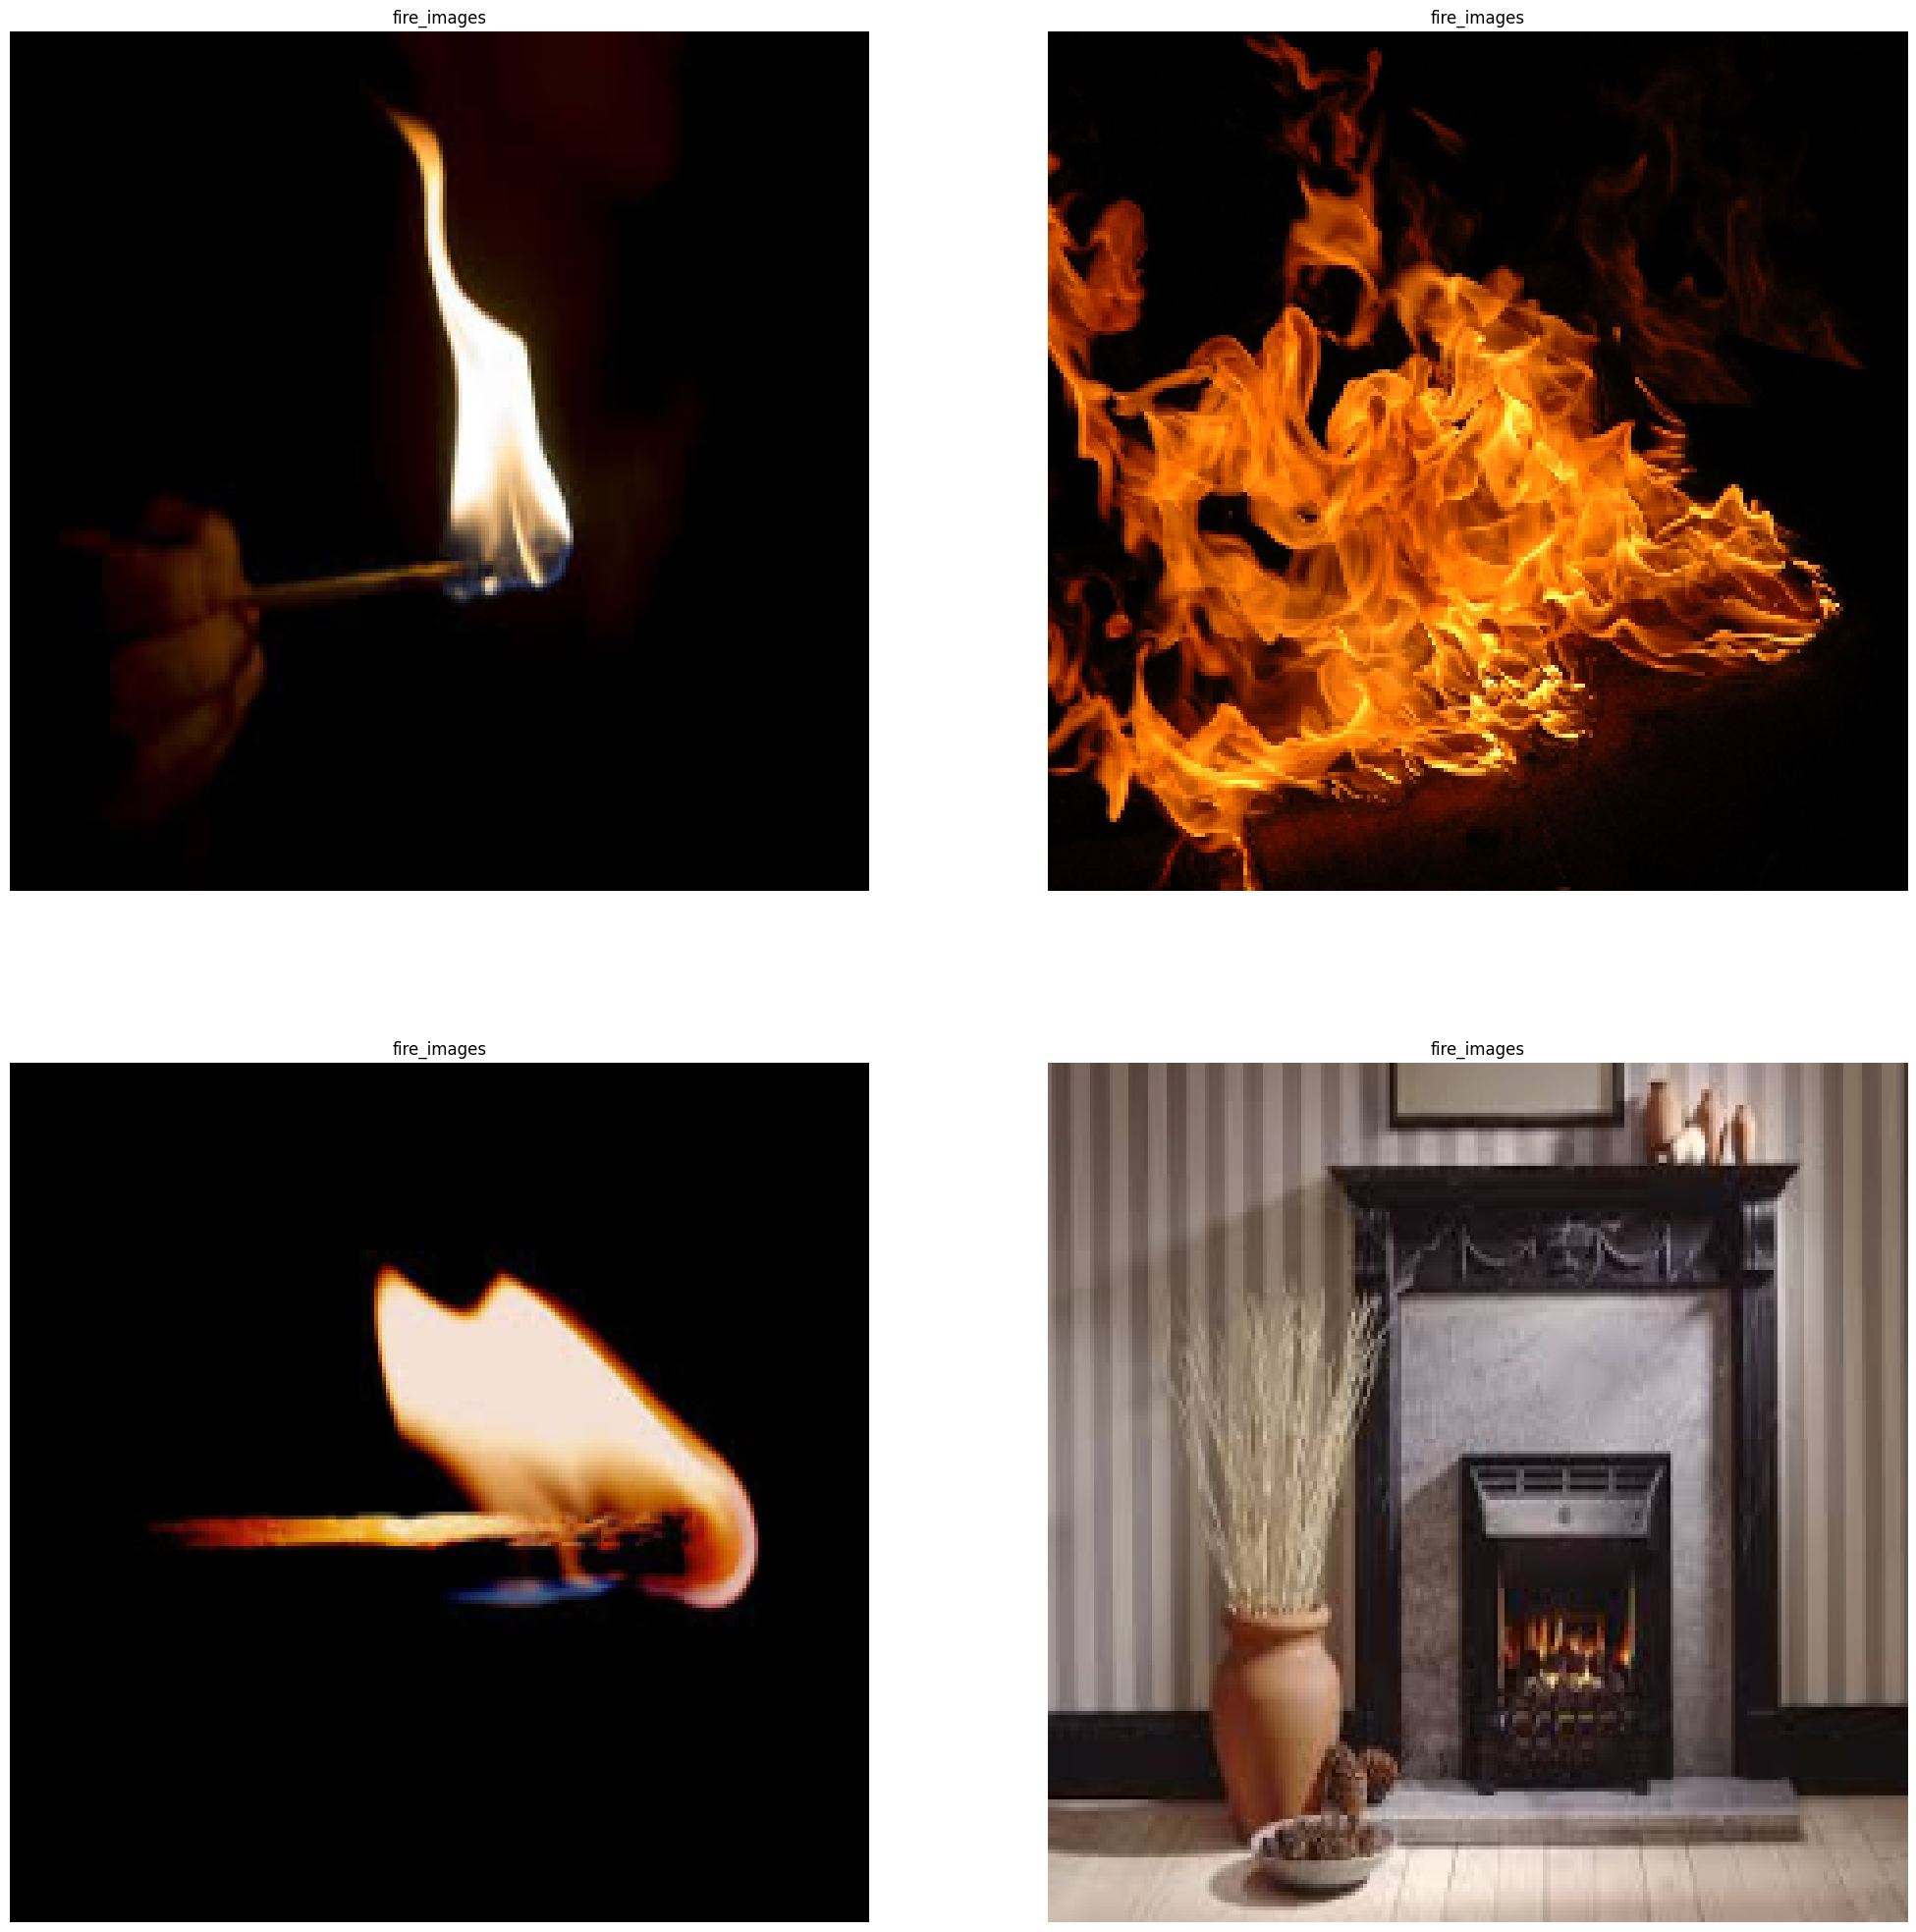

In [16]:
def Test(path):
    save_model = keras.models.load_model('/kaggle/working/my_keras_model.h5')
    images = []
    pred = []
    class_names = ['fire_images', 'non_fire_images']
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img))
        image = cv2.resize(image, (224, 224))
        image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images.append(image)
        image = np.expand_dims(image, axis=0)
        predict = save_model.predict(image)
        pred.append(np.where(predict >= 0.5, 1, 0))
    plt.figure(figsize=(25, 25))
    for i in range(len(pred)):
        plt.subplot(int(np.ceil(len(pred) / 2)), 2, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(f'{class_names[pred[i][0][0]]}')
        plt.axis("off")
    plt.show()

Test('/kaggle/input/test-iamge')